In [1]:
import folium
import matplotlib.pyplot as plt
import sys
sys.path.append('..')


from scripts.sourcing_data import TramData, OpenStreetMapData

2025-05-30 19:02:51,705 - INFO - Logging initialized.


In [2]:
tram_data = TramData()
osm_data = OpenStreetMapData()

2025-05-30 19:02:51,713 - INFO - Initializing TramData...
2025-05-30 19:02:51,715 - INFO - Starting fetch for stops and passages...
2025-05-30 19:02:51,716 - INFO - Fetching stops data from API...
2025-05-30 19:02:51,897 - INFO - Successfully fetched stops data.
2025-05-30 19:02:51,899 - INFO - Fetching passage data for stop: 458
2025-05-30 19:02:51,902 - INFO - Fetching passage data for stop: 457
2025-05-30 19:02:51,904 - INFO - Fetching passage data for stop: 126
2025-05-30 19:02:51,907 - INFO - Fetching passage data for stop: 3038
2025-05-30 19:02:51,910 - INFO - Fetching passage data for stop: 2691


Loading config from: e:\projects\krakow-tram-optimization\notebooks\..\config.ini


2025-05-30 19:02:51,914 - INFO - Fetching passage data for stop: 2690
2025-05-30 19:02:51,915 - INFO - Fetching passage data for stop: 747
2025-05-30 19:02:51,918 - INFO - Fetching passage data for stop: 824
2025-05-30 19:02:51,919 - INFO - Fetching passage data for stop: 3837
2025-05-30 19:02:51,921 - INFO - Fetching passage data for stop: 746
2025-05-30 19:02:51,921 - INFO - Fetching passage data for stop: 3836
2025-05-30 19:02:51,926 - INFO - Fetching passage data for stop: 3643
2025-05-30 19:02:51,929 - INFO - Fetching passage data for stop: 3647
2025-05-30 19:02:51,931 - INFO - Fetching passage data for stop: 3176
2025-05-30 19:02:51,933 - INFO - Fetching passage data for stop: 744
2025-05-30 19:02:51,935 - INFO - Fetching passage data for stop: 3646
2025-05-30 19:02:52,079 - INFO - Fetching passage data for stop: 2821
2025-05-30 19:02:52,085 - INFO - Fetching passage data for stop: 311
2025-05-30 19:02:52,093 - INFO - Fetching passage data for stop: 84
2025-05-30 19:02:52,097 - I

In [3]:
LINE = 18 

coordinates = list(tram_data.lines_df[tram_data.lines_df.index == LINE]['coordinates'])[0]
map_obj = folium.Map(location=[coordinates[0][0], coordinates[0][1]], zoom_start=13)

for point in coordinates:
    stop_name = [
        stop for stop, metadata in tram_data.stops_data.items()
        if metadata['latitude'] == point[0] and metadata['longitude'] == point[1]
    ][0]
    folium.Marker(
        location=[point[0], point[1]],
        popup=f"{stop_name}",
        icon=folium.Icon(color="blue")
    ).add_to(map_obj)

coordinates_line = [[point[0], point[1]] for point in coordinates]
folium.PolyLine(coordinates_line, color="blue", weight=2.5, opacity=1).add_to(map_obj)
map_obj

In [4]:
tram_data.stops_df

,category,latitude,longitude,number_of_lines,lines,min_time_between_trams,max_time_between_trams,avg_time_between_trams
stop,,,,,,,,
Pleszów,tram,50.073025,20.117432,2,"[10, 21]",249.0,1209.0,769.000000
Koksochemia (nż),tram,50.072217,20.104420,2,"[10, 21]",69.0,1269.0,699.000000
Lubicz,tram,50.065631,19.951822,5,"[4, 14, 20, 52, 76]",-471.0,1329.0,418.655172
Czerwone Maki P+R,tram,50.018386,19.889266,4,"[11, 18, 52, 72]",-471.0,1329.0,470.538462
Chmieleniec,tram,50.021027,19.897951,4,"[11, 18, 52, 72]",-411.0,1269.0,426.500000
...,...,...,...,...,...,...,...,...
Mrozowa,tram,50.084566,20.071970,0,[],NaN,NaN,NaN
Blokowa,tram,50.085745,20.074574,0,[],NaN,NaN,NaN
Os. Piastów,tram,50.102382,20.012230,2,"[21, 52]",-293.0,1087.0,437.000000


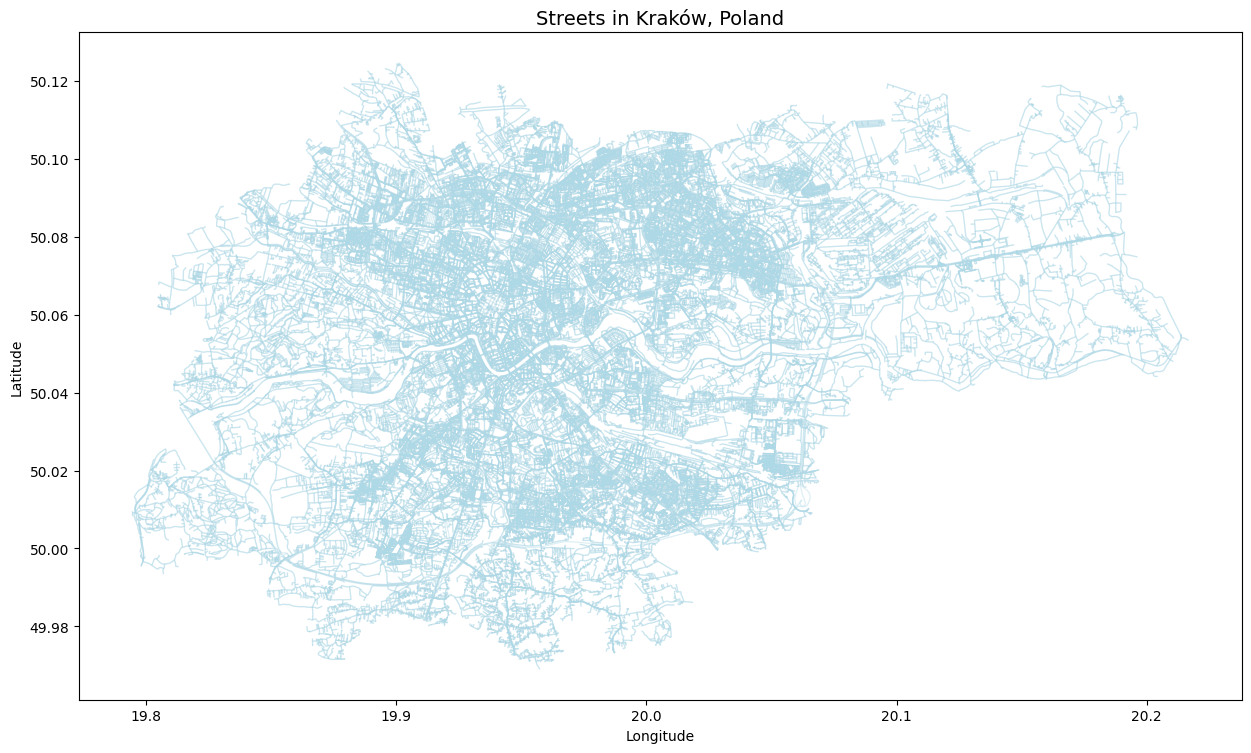

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))

if not osm_data.streets_df.empty:
    osm_data.streets_df.plot(ax=ax, color="lightblue", linewidth=0.9, alpha=0.4, label="Streets")

ax.set_title(f"Streets in {osm_data.place}", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

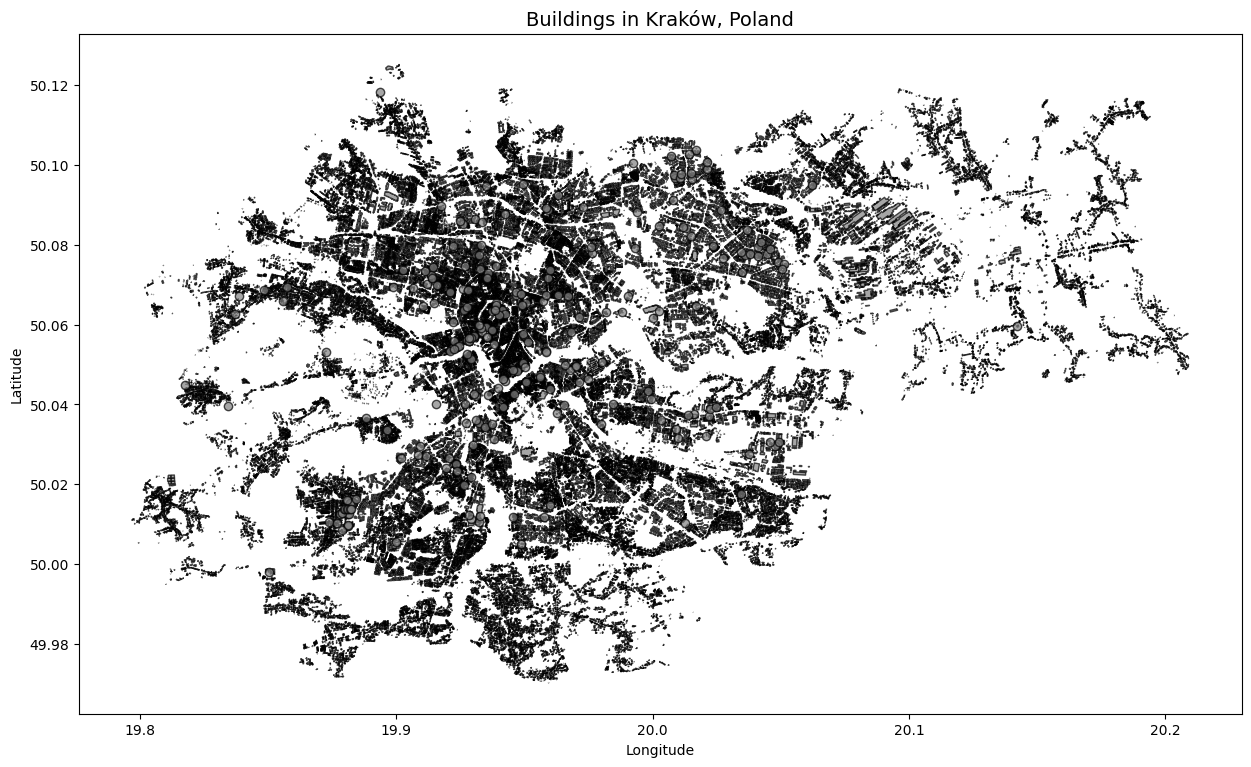

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))

if not osm_data.buildings_df.empty:
    osm_data.buildings_df.plot(ax=ax, color="gray", edgecolor="black", alpha=0.7, label="Buildings")

ax.set_title(f"Buildings in {osm_data.place}", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

SyntaxError: invalid syntax (32324070.py, line 1)